In [1]:
# Imports and plotting settings
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

from scipy.cluster.hierarchy import dendrogram, linkage

# For nicer plotting
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True


In [2]:
# Load Wine dataset and basic exploration
wine = datasets.load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

# Basic exploration
print("Shape:", X.shape)
display(X.head())
display(X.info())
display(X.describe())

# Also show class distribution (true labels) for reference
print("\nTrue class distribution:")
print(y.value_counts().sort_index())


Shape: (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

None

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000



True class distribution:
target
0    59
1    71
2    48
Name: count, dtype: int64


In [3]:
# Standardize the dataset's features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Wrap into DataFrame for convenience
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
display(X_scaled_df.head())


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [4]:
# PCA helper function to reduce to 2D for plotting
pca = PCA(n_components=2, random_state=42)
X_pca2 = pca.fit_transform(X_scaled)

def plot_clusters_2d(labels, title="Cluster plot (PCA 2D)", show_noise=True):
    """
    labels: array-like labels for each sample (noise in DBSCAN often -1)
    """
    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))

    fig, ax = plt.subplots(figsize=(8,6))
    for i, lab in enumerate(unique_labels):
        mask = labels == lab
        label_name = f"Cluster {lab}" if lab != -1 else "Noise"
        marker = "x" if lab == -1 and show_noise else "o"
        alpha = 0.9 if lab != -1 else 0.5
        ax.scatter(X_pca2[mask, 0], X_pca2[mask, 1], label=label_name, s=50, marker=marker, alpha=alpha)
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.set_title(title)
    ax.legend()
    plt.show()



Agglomerative: n_clusters = 2
  Silhouette Score: 0.2670


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


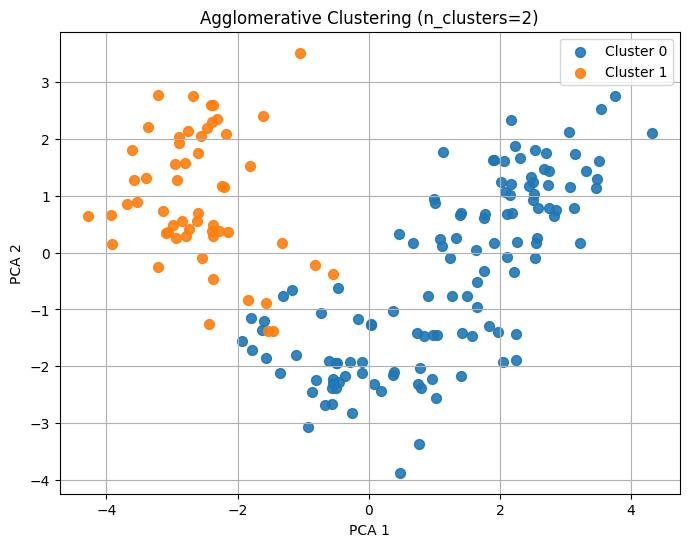


Agglomerative: n_clusters = 3
  Silhouette Score: 0.2774


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


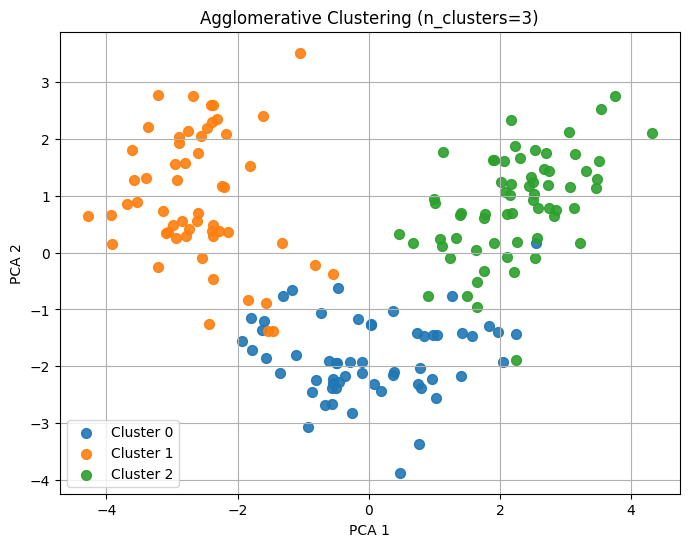


Agglomerative: n_clusters = 4
  Silhouette Score: 0.2258


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


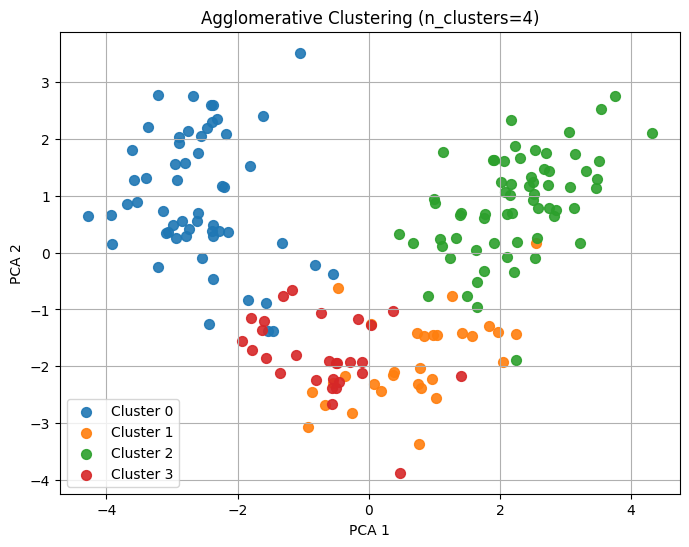


Agglomerative: n_clusters = 5
  Silhouette Score: 0.1867


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


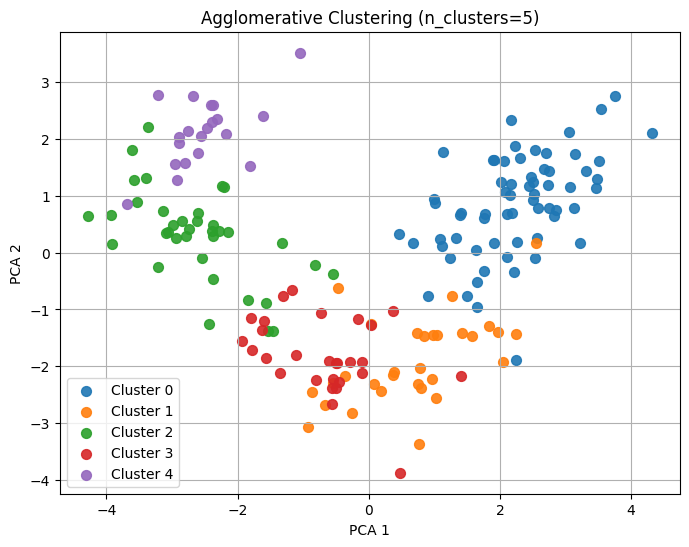

In [9]:
# Agglomerative clustering for multiple n_clusters values
from sklearn.cluster import AgglomerativeClustering

n_clusters_list = [2, 3, 4, 5]
agg_results = {}

for k in n_clusters_list:
    # For linkage='ward' the distance metric must be Euclidean; do not provide affinity (removed in newer sklearn)
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(X_scaled)
    agg_results[k] = labels
    print(f"\nAgglomerative: n_clusters = {k}")
    # If >1 clusters, compute silhouette (silhouette needs at least 2 clusters)
    if len(np.unique(labels)) > 1:
        sil = silhouette_score(X_scaled, labels)
        print(f"  Silhouette Score: {sil:.4f}")
    else:
        print("  Silhouette Score: N/A (only one cluster)")
    # Plot PCA visualization
    plot_clusters_2d(labels, title=f"Agglomerative Clustering (n_clusters={k})")


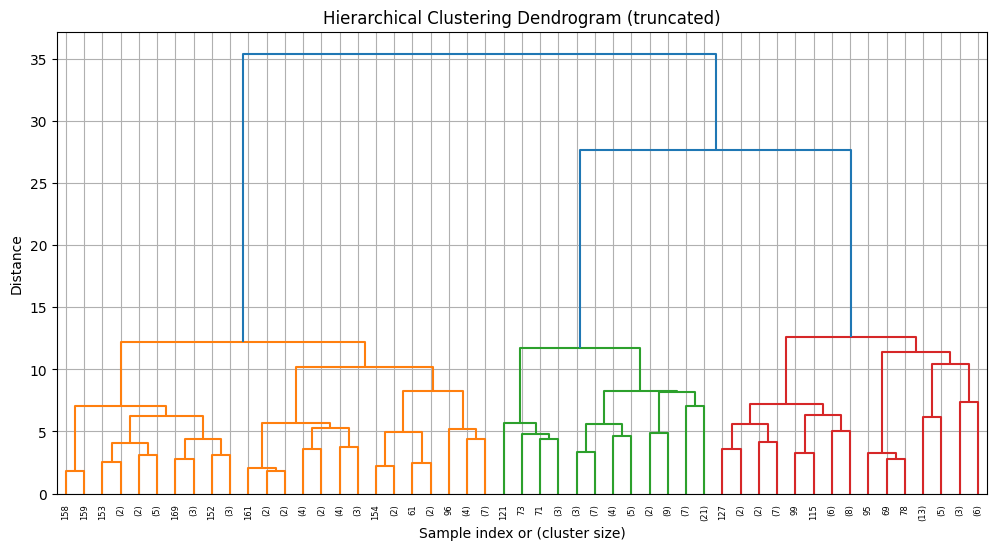

In [7]:
# Dendrogram
# We'll use Ward linkage for dendrogram (sensible for Euclidean standardized features)
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5, show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.show()




DBSCAN eps=0.3, min_samples=3 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


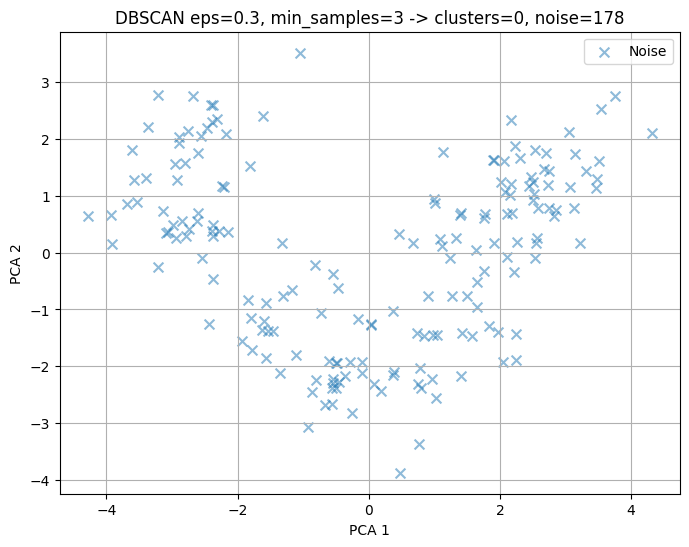


DBSCAN eps=0.3, min_samples=5 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


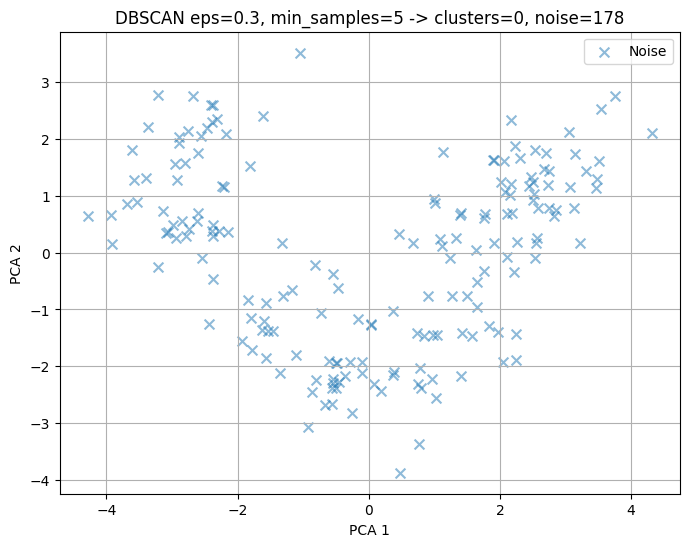


DBSCAN eps=0.3, min_samples=7 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


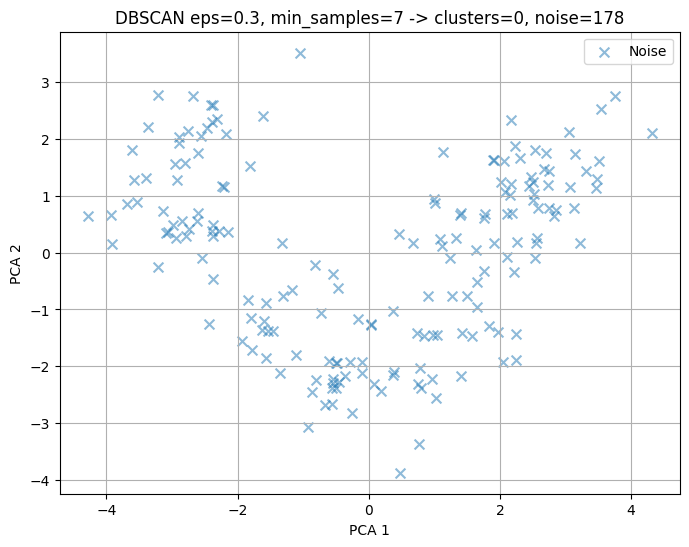


DBSCAN eps=0.3, min_samples=10 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


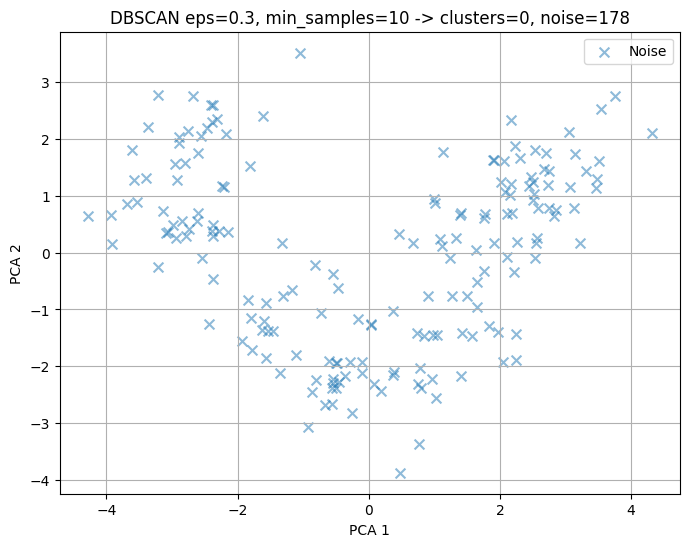


DBSCAN eps=0.5, min_samples=3 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


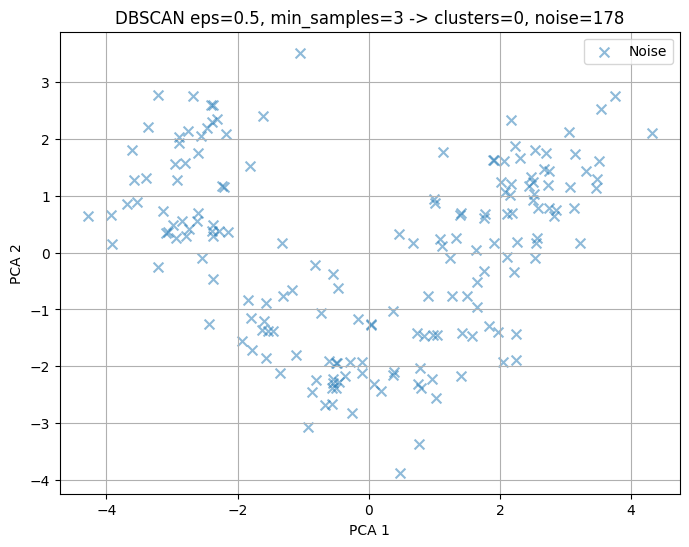


DBSCAN eps=0.5, min_samples=5 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


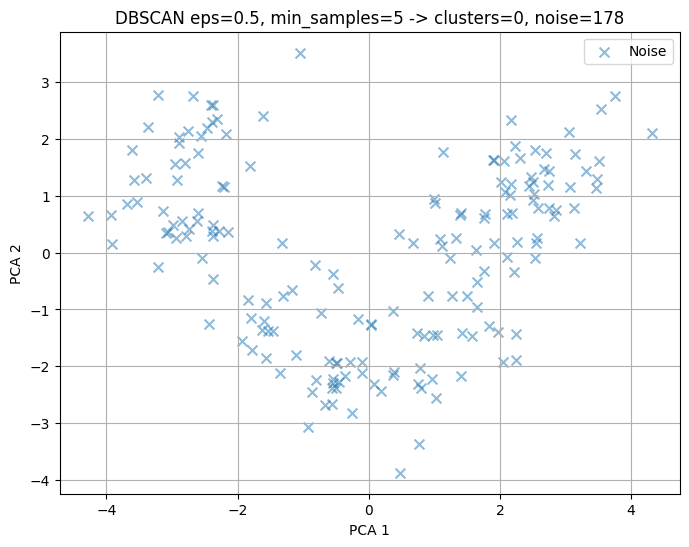


DBSCAN eps=0.5, min_samples=7 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


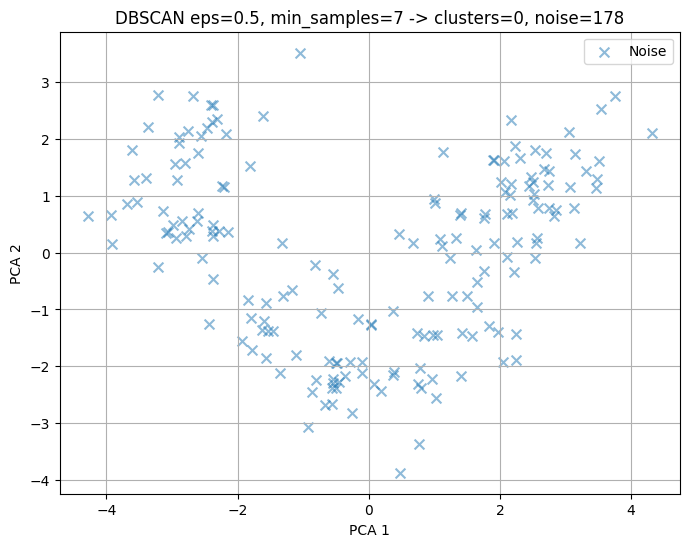


DBSCAN eps=0.5, min_samples=10 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


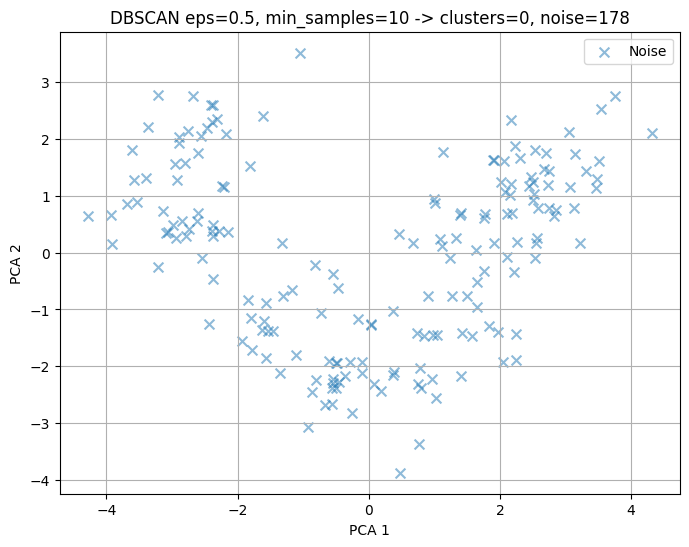


DBSCAN eps=0.7, min_samples=3 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


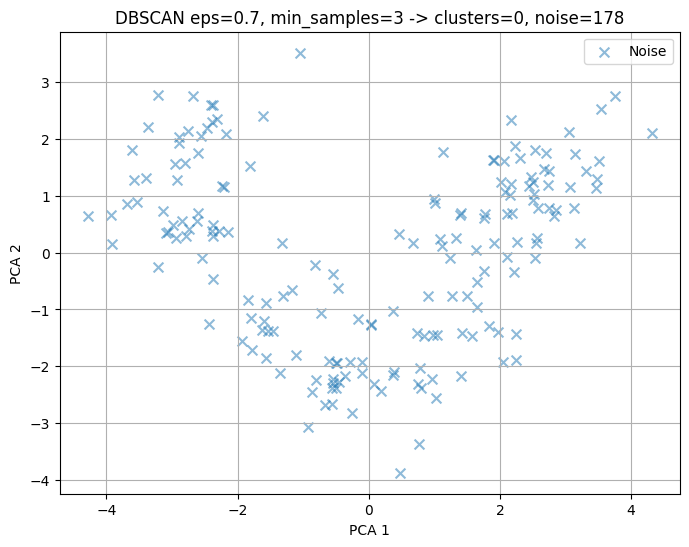


DBSCAN eps=0.7, min_samples=5 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


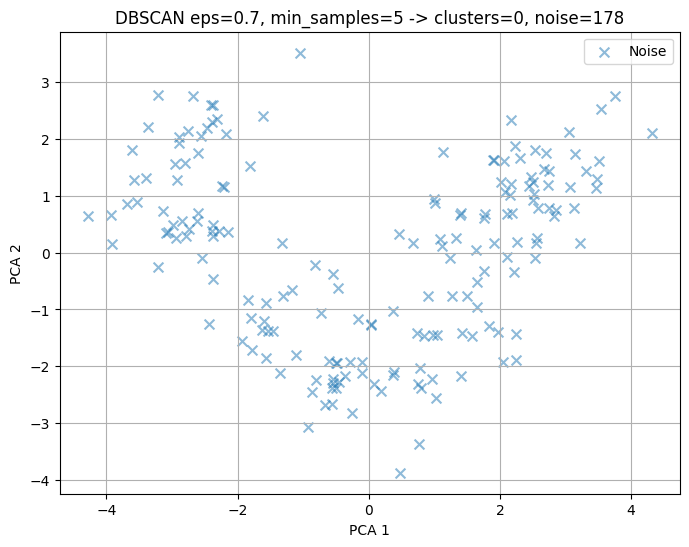


DBSCAN eps=0.7, min_samples=7 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


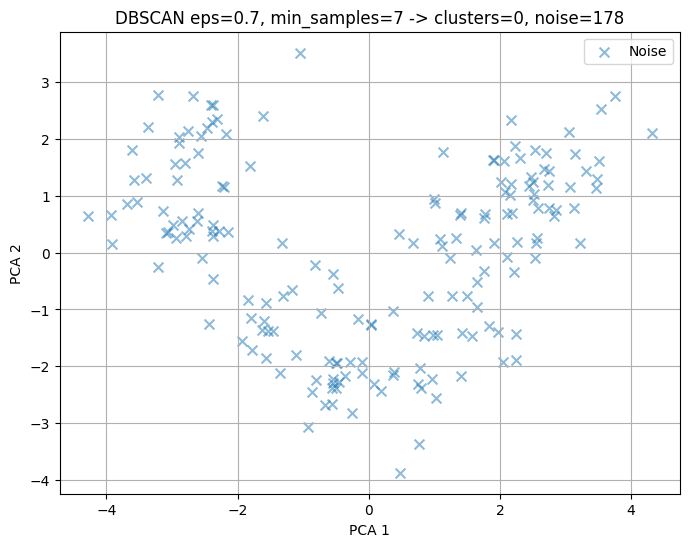


DBSCAN eps=0.7, min_samples=10 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


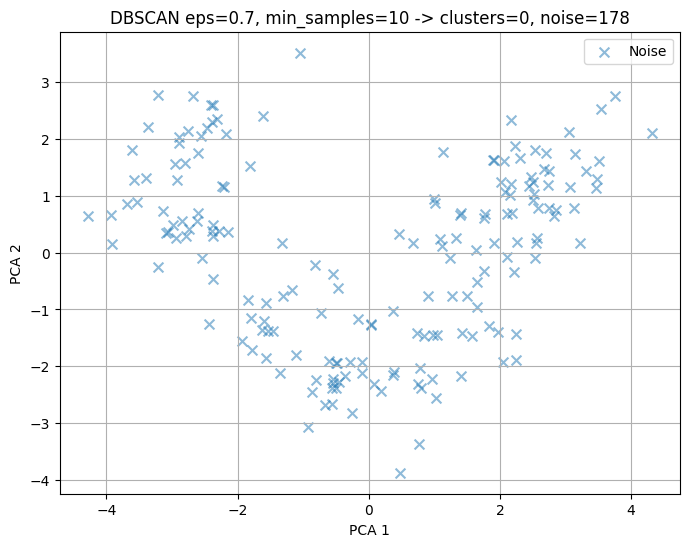


DBSCAN eps=0.9, min_samples=3 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


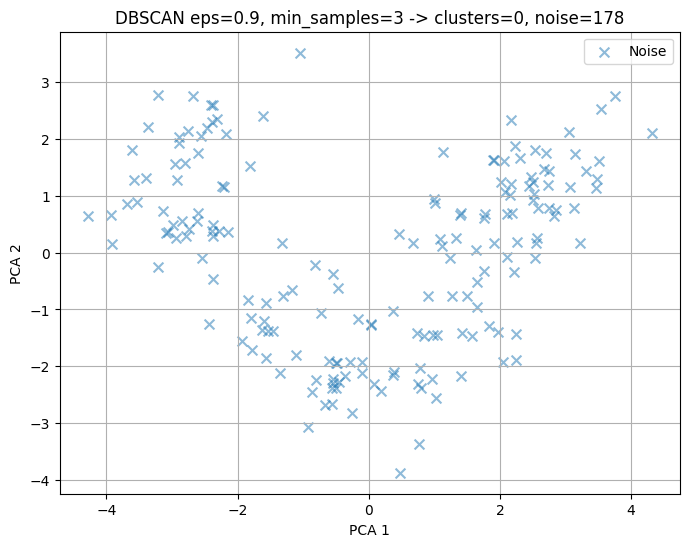


DBSCAN eps=0.9, min_samples=5 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


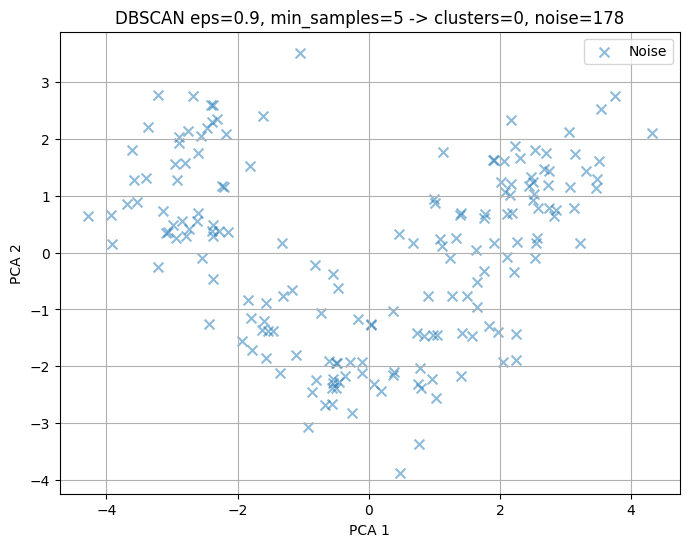


DBSCAN eps=0.9, min_samples=7 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


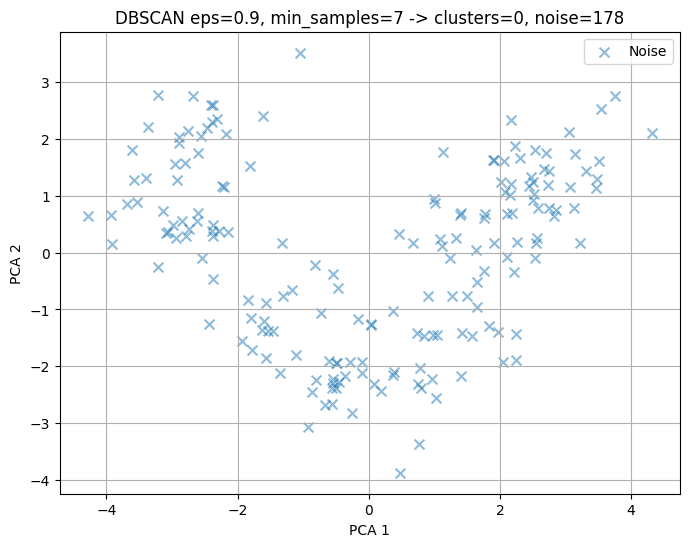


DBSCAN eps=0.9, min_samples=10 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


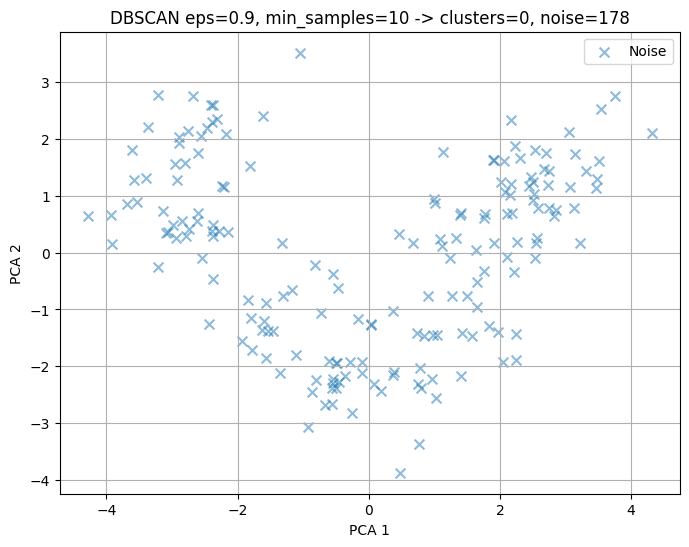


DBSCAN eps=1.1, min_samples=3 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


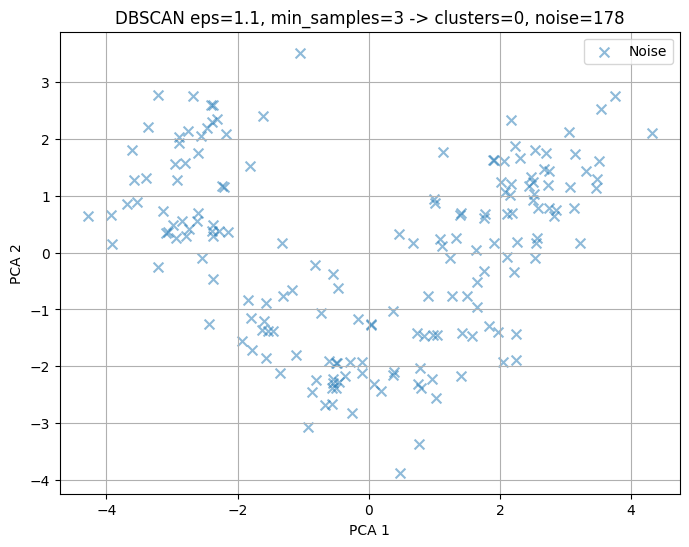


DBSCAN eps=1.1, min_samples=5 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


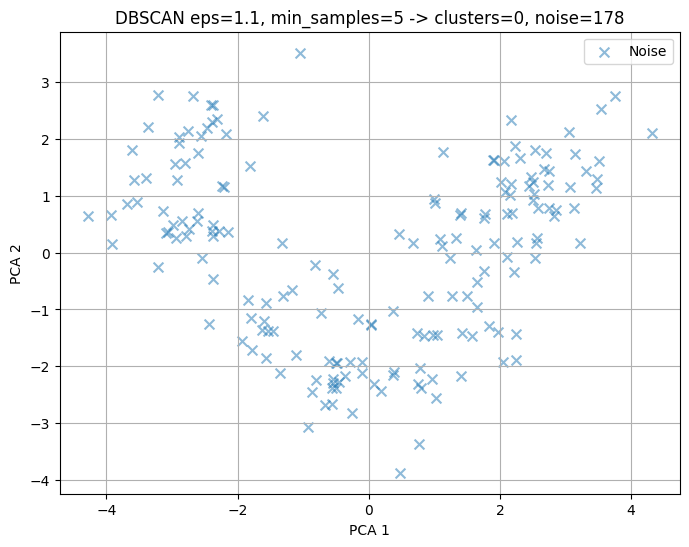


DBSCAN eps=1.1, min_samples=7 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


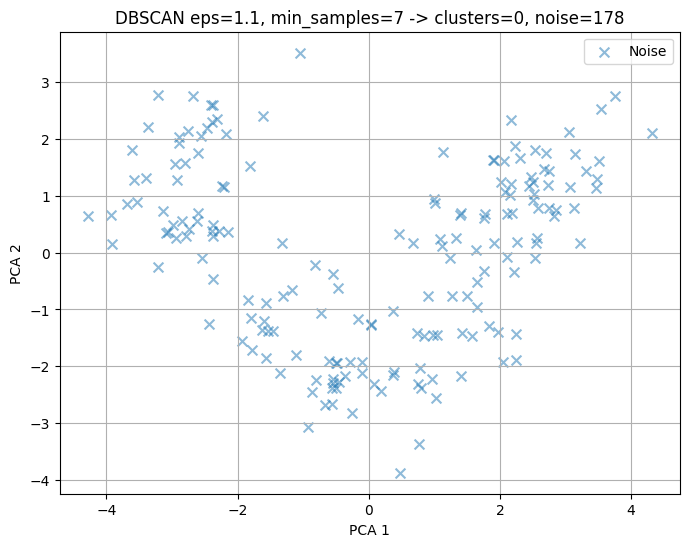


DBSCAN eps=1.1, min_samples=10 -> clusters=0, noise=178


/tmp/ipython-input-311420541.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", max(3, len(unique_labels)))


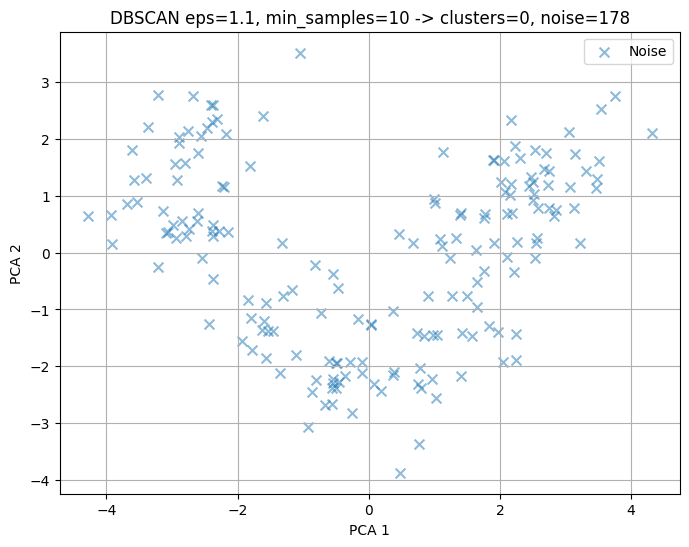

,eps,min_samples,n_clusters,n_noise,silhouette,homogeneity,completeness
0,0.3,3,0,178,NaN,0.0,1.0
1,0.3,5,0,178,NaN,0.0,1.0
2,0.3,7,0,178,NaN,0.0,1.0
3,0.3,10,0,178,NaN,0.0,1.0
4,0.5,3,0,178,NaN,0.0,1.0
5,0.5,5,0,178,NaN,0.0,1.0
6,0.5,7,0,178,NaN,0.0,1.0
7,0.5,10,0,178,NaN,0.0,1.0
8,0.7,3,0,178,NaN,0.0,1.0
9,0.7,5,0,178,NaN,0.0,1.0


In [8]:
# 10: DBSCAN parameter sweep and evaluation
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

eps_values = [0.3, 0.5, 0.7, 0.9, 1.1]
min_samples_values = [3, 5, 7, 10]

results = []

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s, metric='euclidean')
        labels = db.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # Compute silhouette only when there are 2 or more clusters (ignoring noise label is allowed)
        sil = None
        try:
            # Silhouette requires >1 cluster (non-singleton); if only noise or one cluster, will raise
            if n_clusters > 1:
                # silhouette_score expects labels for all points; it's okay to include noise label -1
                sil = silhouette_score(X_scaled, labels)
        except Exception as e:
            sil = None

        homog = homogeneity_score(y, labels)
        comp = completeness_score(y, labels)

        results.append({
            'eps': eps,
            'min_samples': min_s,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette': sil,
            'homogeneity': homog,
            'completeness': comp
        })

        # Visualize for some typical combos (optional): we will show every result for clarity
        title = f"DBSCAN eps={eps}, min_samples={min_s} -> clusters={n_clusters}, noise={n_noise}"
        print("\n" + title)
        plot_clusters_2d(labels, title=title)

# Summarize results in a DataFrame
results_df = pd.DataFrame(results)
# Format silhouette for display
results_df['silhouette'] = results_df['silhouette'].apply(lambda x: np.nan if x is None else round(x, 4))
results_df['homogeneity'] = results_df['homogeneity'].round(4)
results_df['completeness'] = results_df['completeness'].round(4)

display(results_df.sort_values(by=['n_clusters', 'eps', 'min_samples'], ascending=[False, True, True]).reset_index(drop=True))
